In [1]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import Birch
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
import scipy.stats

In [3]:
df = pd.read_csv('/content/drive/MyDrive/datadmg/covtype_train.csv')
df.head()

,Elevation,Aspect,Slope,Hillshade_9am,Hillshade_Noon,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Fire_Points,Soil_Type,Wilderness,target
0,elevation_medium,aspect_medium,slope_low,hillshade_9am_max,hillnoon_max,0,1,low,22,0,2
1,elevation_high,aspect_medium,slope_low,hillshade_9am_max,hillnoon_max,1,1,mid,32,2,1
2,elevation_medium,aspect_low,slope_low,hillshade_9am_max,hillnoon_max,1,1,low,10,2,2
3,elevation_high,aspect_ultra,slope_medium,hillshade_9am_max,hillnoon_max,2,1,low,23,2,1
4,elevation_high,aspect_high,slope_low,hillshade_9am_max,hillnoon_max,2,1,mid,28,0,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406708 entries, 0 to 406707
Data columns (total 11 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   Elevation                           406708 non-null  object
 1   Aspect                              406708 non-null  object
 2   Slope                               406708 non-null  object
 3   Hillshade_9am                       406708 non-null  object
 4   Hillshade_Noon                      406708 non-null  object
 5   Horizontal_Distance_To_Hydrology    406708 non-null  int64 
 6   Vertical_Distance_To_Hydrology      406708 non-null  int64 
 7   Horizontal_Distance_To_Fire_Points  406708 non-null  object
 8   Soil_Type                           406708 non-null  int64 
 9   Wilderness                          406708 non-null  int64 
 10  target                              406708 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 34

In [5]:
df.nunique()

Elevation                              4
Aspect                                 4
Slope                                  4
Hillshade_9am                          2
Hillshade_Noon                         2
Horizontal_Distance_To_Hydrology       7
Vertical_Distance_To_Hydrology         6
Horizontal_Distance_To_Fire_Points     3
Soil_Type                             40
Wilderness                             4
target                                 7
dtype: int64

In [6]:
df.isna().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Hillshade_9am                         0
Hillshade_Noon                        0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Fire_Points    0
Soil_Type                             0
Wilderness                            0
target                                0
dtype: int64

In [7]:
#one hot encoding categorical data and scale the numerical data (There is not numerical data :( )
numerical_df = pd.DataFrame()
categorical_df = df.copy()
categorical_df["Soil_Type"] = categorical_df["Soil_Type"].astype('category')
categorical_df["Wilderness"] = categorical_df["Wilderness"].astype('category')
categorical_df["Horizontal_Distance_To_Hydrology"] = categorical_df["Horizontal_Distance_To_Hydrology"].astype('category')
categorical_df["Vertical_Distance_To_Hydrology"] = categorical_df["Vertical_Distance_To_Hydrology"].astype('category')
numerical_df, categorical_df

(Empty DataFrame
 Columns: []
 Index: [],                Elevation         Aspect  ... Wilderness target
 0       elevation_medium  aspect_medium  ...          0      2
 1         elevation_high  aspect_medium  ...          2      1
 2       elevation_medium     aspect_low  ...          2      2
 3         elevation_high   aspect_ultra  ...          2      1
 4         elevation_high    aspect_high  ...          0      2
 ...                  ...            ...  ...        ...    ...
 406703   elevation_ultra  aspect_medium  ...          0      7
 406704  elevation_medium     aspect_low  ...          0      2
 406705  elevation_medium  aspect_medium  ...          0      2
 406706    elevation_high    aspect_high  ...          0      2
 406707  elevation_medium   aspect_ultra  ...          2      2
 
 [406708 rows x 11 columns])

In [8]:
categorical_ohe_df = pd.get_dummies(categorical_df)
categorical_ohe_df

,target,Elevation_elevation_high,Elevation_elevation_low,Elevation_elevation_medium,Elevation_elevation_ultra,Aspect_aspect_high,Aspect_aspect_low,Aspect_aspect_medium,Aspect_aspect_ultra,Slope_slope_high,Slope_slope_low,Slope_slope_medium,Slope_slope_ultra,Hillshade_9am_hillshade_9am_max,Hillshade_9am_hillshade_9am_min,Hillshade_Noon_hillnoon_max,Hillshade_Noon_hillnoon_min,Horizontal_Distance_To_Hydrology_0,Horizontal_Distance_To_Hydrology_1,Horizontal_Distance_To_Hydrology_2,Horizontal_Distance_To_Hydrology_3,Horizontal_Distance_To_Hydrology_4,Horizontal_Distance_To_Hydrology_5,Horizontal_Distance_To_Hydrology_6,Vertical_Distance_To_Hydrology_0,Vertical_Distance_To_Hydrology_1,Vertical_Distance_To_Hydrology_2,Vertical_Distance_To_Hydrology_3,Vertical_Distance_To_Hydrology_4,Vertical_Distance_To_Hydrology_5,Horizontal_Distance_To_Fire_Points_high,Horizontal_Distance_To_Fire_Points_low,Horizontal_Distance_To_Fire_Points_mid,Soil_Type_0,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Wilderness_0,Wilderness_1,Wilderness_2,Wilderness_3
0,2,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,1,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,2,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,2,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406703,7,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
406704,2,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
406705,2,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
406706,2,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [9]:
final_df = categorical_ohe_df.copy()
final_df

,target,Elevation_elevation_high,Elevation_elevation_low,Elevation_elevation_medium,Elevation_elevation_ultra,Aspect_aspect_high,Aspect_aspect_low,Aspect_aspect_medium,Aspect_aspect_ultra,Slope_slope_high,Slope_slope_low,Slope_slope_medium,Slope_slope_ultra,Hillshade_9am_hillshade_9am_max,Hillshade_9am_hillshade_9am_min,Hillshade_Noon_hillnoon_max,Hillshade_Noon_hillnoon_min,Horizontal_Distance_To_Hydrology_0,Horizontal_Distance_To_Hydrology_1,Horizontal_Distance_To_Hydrology_2,Horizontal_Distance_To_Hydrology_3,Horizontal_Distance_To_Hydrology_4,Horizontal_Distance_To_Hydrology_5,Horizontal_Distance_To_Hydrology_6,Vertical_Distance_To_Hydrology_0,Vertical_Distance_To_Hydrology_1,Vertical_Distance_To_Hydrology_2,Vertical_Distance_To_Hydrology_3,Vertical_Distance_To_Hydrology_4,Vertical_Distance_To_Hydrology_5,Horizontal_Distance_To_Fire_Points_high,Horizontal_Distance_To_Fire_Points_low,Horizontal_Distance_To_Fire_Points_mid,Soil_Type_0,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Wilderness_0,Wilderness_1,Wilderness_2,Wilderness_3
0,2,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,1,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,2,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,2,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406703,7,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
406704,2,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
406705,2,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
406706,2,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


Text(0.5, 1.0, 'PCA Number of Compoenents for Cumulative Variance')

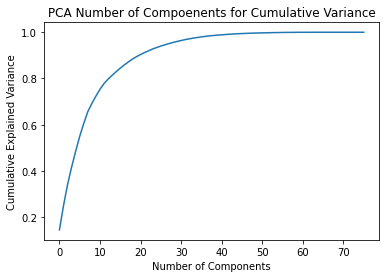

In [ ]:
#applying pca for dimension reduction 
pca = PCA().fit(final_df.drop(['target'], axis = 1))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Number of Compoenents for Cumulative Variance')

In [ ]:
pca = PCA(n_components = 30)
kmeans_df = pd.DataFrame(pca.fit_transform(final_df.drop(['target'], axis = 1)))
kmeans_df = pd.concat([kmeans_df, final_df['target']], axis =1)
kmeans_df

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,target
0,-0.456121,-1.226673,-0.143316,0.157593,-0.614515,0.598759,0.282144,-0.624421,-0.178452,0.123915,...,-0.096811,-0.020756,-0.080450,0.069237,-0.156634,0.098068,0.023425,-0.213015,0.044021,2
1,-0.116953,0.846177,-0.447655,-0.040868,0.533027,1.164262,-0.938711,-0.153934,-0.348781,-0.090512,...,-0.005799,-0.045707,0.033792,0.001718,0.000087,-0.012212,0.001553,-0.090627,-0.047137,1
2,0.576781,-0.268406,-0.289279,1.569990,0.088740,0.031672,-0.528992,0.048229,0.013210,-0.252993,...,0.095964,-0.071856,-0.164605,-0.113799,0.128182,-0.108521,0.098183,0.345094,0.645979,2
3,1.068728,0.406292,0.029474,-0.815188,-0.029794,-0.288478,-0.001410,0.519396,0.053149,-0.964185,...,0.629384,-0.457737,-0.101175,0.087229,-0.290237,0.019753,-0.110430,-0.138783,0.016385,1
4,-1.284324,0.671982,0.124091,-0.295579,0.293275,0.348696,0.374924,0.106345,1.122025,-0.157438,...,0.041236,-0.037840,0.043663,-0.009678,-0.038008,-0.027408,-0.014113,-0.005758,0.019303,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406703,-0.935444,0.269953,0.435321,0.396058,-0.055778,1.304419,-0.426888,-0.078195,-0.377437,0.281233,...,-0.058299,-0.052882,0.096249,0.114970,-0.119311,-0.218806,-0.216705,-0.316379,-0.064840,7
406704,-0.653727,-1.076332,1.402545,0.000546,1.026560,-0.060527,-0.053799,0.195532,0.346614,-0.307857,...,-0.100116,0.042907,-0.091553,0.018785,-0.034728,0.042251,-0.045830,-0.025807,0.025666,2
406705,-1.198912,-0.950816,0.400796,0.011929,0.215635,1.192905,0.217661,-0.249794,0.139392,-0.279146,...,-0.035947,-0.000021,-0.027372,0.057721,-0.057414,0.010783,-0.018900,-0.086145,0.002165,2
406706,-0.415955,1.027230,0.245557,-0.028009,-0.635586,-0.268463,1.306538,-0.456532,1.015043,0.083458,...,0.003690,-0.094839,0.077125,-0.036313,-0.055645,-0.044090,-0.012658,0.009648,0.023259,2


In [ ]:
#K means
kmeans = KMeans(init="random", n_clusters = 7, max_iter=1000)
kmeans.fit(kmeans_df.drop(['target'], axis=1))
clusters_kmeans = kmeans.predict(kmeans_df.drop(['target'], axis=1))

In [ ]:
final_df_clustered_kmeans = kmeans_df.copy()
final_df_clustered_kmeans['Clusters'] = clusters_kmeans+1

In [ ]:
final_df_clustered_kmeans[['target','Clusters']]

,target,Clusters
0,2,6
1,1,5
2,2,7
3,1,4
4,2,5
...,...,...
406703,7,5
406704,2,5
406705,2,5
406706,2,1


In [ ]:
centroids_kmeans = kmeans.cluster_centers_
centroids_kmeans = pd.DataFrame(centroids_kmeans)
centroids_kmeans

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.695944,0.823487,0.333728,0.044921,0.088438,0.036867,0.585307,-0.156604,-0.007199,0.061732,...,0.000054,-0.003398,-0.003244,0.012456,0.008976,0.002255,-0.003885,-0.001796,0.000146,0.001032
1,0.745970,-0.616215,0.590824,0.097036,-0.378514,-0.059948,0.216436,0.323554,-0.513066,0.567037,...,0.011684,-0.026092,-0.066274,-0.107911,0.010010,0.036791,0.013085,0.031972,-0.013643,-0.000890
2,-0.603503,0.294479,0.230334,0.370209,-0.578020,-0.195968,-0.228338,-0.063818,0.069091,-0.124113,...,-0.011043,0.015004,0.005303,0.010417,0.005845,-0.005658,-0.004383,-0.007876,0.005554,-0.002530
3,0.500785,0.185676,-0.685110,-0.220330,-0.009280,-0.165784,-0.302064,0.016692,0.036441,-0.087815,...,0.019113,-0.011980,-0.001898,-0.009306,-0.002047,-0.010846,-0.008481,-0.014741,-0.010442,-0.003314
4,-0.872993,0.150556,0.177260,-0.144578,0.570082,0.376252,-0.118924,0.180041,-0.020194,0.051863,...,0.029554,0.007208,0.010529,0.004618,-0.002228,0.005848,0.000252,-0.002779,-0.003300,-0.009100
5,-0.622628,-0.632361,-0.019714,-0.237846,-0.298682,-0.310171,0.165927,-0.148800,0.006543,0.015940,...,-0.017529,-0.015481,0.002922,0.007514,0.002159,-0.009120,0.018044,0.005847,-0.010399,0.005241
6,0.824438,-0.832398,-0.118186,0.410153,0.228376,0.290198,-0.125309,-0.031186,0.178411,-0.210900,...,-0.054248,0.031573,0.016768,0.030092,-0.020188,0.004619,-0.007060,0.016662,0.039376,0.016466


In [ ]:
pca = PCA(n_components=2)
pca_clusters_kmeans = pd.DataFrame(pca.fit_transform(final_df_clustered_kmeans.drop(["Clusters", "target"], axis=1)))
pca_clusters_kmeans

,0,1
0,-0.456121,-1.226679
1,-0.116953,0.846175
2,0.576781,-0.268408
3,1.068728,0.406291
4,-1.284324,0.671977
...,...,...
406703,-0.935444,0.269955
406704,-0.653727,-1.076335
406705,-1.198912,-0.950820
406706,-0.415955,1.027225


In [ ]:
pca_centroids_kmeans = pd.DataFrame(pca.transform(centroids_kmeans))
pca_centroids_kmeans.columns = ['X', 'Y']
pca_centroids_kmeans

,X,Y
0,0.695944,0.823487
1,0.745970,-0.616215
2,-0.603503,0.294479
3,0.500785,0.185676
4,-0.872993,0.150556
5,-0.622628,-0.632361
6,0.824438,-0.832398


In [ ]:
pca_clusters_kmeans_ = pd.concat([pca_clusters_kmeans, final_df_clustered_kmeans['Clusters']], axis =1)
pca_clusters_kmeans_

,0,1,Clusters
0,-0.456121,-1.226679,6
1,-0.116953,0.846175,5
2,0.576781,-0.268408,7
3,1.068728,0.406291,4
4,-1.284324,0.671977,5
...,...,...,...
406703,-0.935444,0.269955,5
406704,-0.653727,-1.076335,5
406705,-1.198912,-0.950820,5
406706,-0.415955,1.027225,1


In [ ]:
#selecting sample of 10000 for plotting
plotting_df_kmeans = pd.DataFrame(np.array(pca_clusters_kmeans_.sample(10000)))
plotting_df_kmeans.columns = ['X', 'Y', 'Clusters']
plotting_df_kmeans

,X,Y,Clusters
0,0.655177,1.115304,1.0
1,-1.284324,0.671977,5.0
2,-0.921886,0.358116,3.0
3,0.783837,-1.443714,2.0
4,0.200790,-0.256035,4.0
...,...,...,...
9995,-1.311067,-0.192700,5.0
9996,-0.041430,0.859325,4.0
9997,0.481174,-1.104783,7.0
9998,1.537612,0.213121,1.0


In [ ]:
cluster1_kmeans = plotting_df_kmeans[plotting_df_kmeans['Clusters'] == 1]
cluster2_kmeans = plotting_df_kmeans[plotting_df_kmeans['Clusters'] == 2]
cluster3_kmeans = plotting_df_kmeans[plotting_df_kmeans['Clusters'] == 3]
cluster4_kmeans = plotting_df_kmeans[plotting_df_kmeans['Clusters'] == 4]
cluster5_kmeans = plotting_df_kmeans[plotting_df_kmeans['Clusters'] == 5]
cluster6_kmeans = plotting_df_kmeans[plotting_df_kmeans['Clusters'] == 6]
cluster7_kmeans = plotting_df_kmeans[plotting_df_kmeans['Clusters'] == 7]

In [ ]:
cluster6_kmeans.shape

(1529, 3)

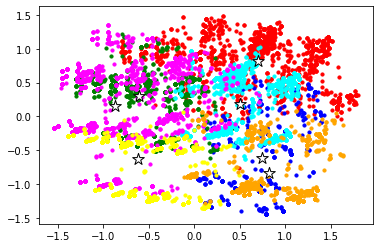

In [ ]:
plt.scatter(cluster1_kmeans['X'], cluster1_kmeans['Y'], s=10, c='red', label ='Cluster 1')
plt.scatter(cluster2_kmeans['X'], cluster2_kmeans['Y'], s=10, c='blue', label ='Cluster 2')
plt.scatter(cluster3_kmeans['X'], cluster3_kmeans['Y'], s=10, c='green', label ='Cluster 3')
plt.scatter(cluster4_kmeans['X'], cluster4_kmeans['Y'], s=10, c='cyan', label ='Cluster 4')
plt.scatter(cluster5_kmeans['X'], cluster5_kmeans['Y'], s=10, c='magenta', label ='Cluster 5')
plt.scatter(cluster6_kmeans['X'], cluster6_kmeans['Y'], s=10, c='yellow', label ='Cluster 6')
plt.scatter(cluster7_kmeans['X'], cluster7_kmeans['Y'], s=10, c='orange', label ='Cluster 7')

plt.scatter(pca_centroids_kmeans['X'], pca_centroids_kmeans['Y'], s=150, marker='*', c='white', edgecolor='black', label='centroids')
plt.show()

Text(0.5, 1.0, 'PCA Number of Compoenents for Cumulative Variance')

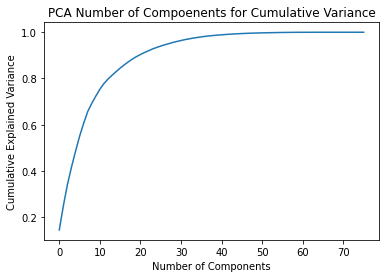

In [10]:
#applying pca for dimension reduction 
pca = PCA().fit(final_df.drop(['target'], axis = 1))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Number of Compoenents for Cumulative Variance')

In [11]:
pca = PCA(n_components = 30)
gaussian_df = pd.DataFrame(pca.fit_transform(final_df.drop(['target'], axis = 1)))
gaussian_df = pd.concat([gaussian_df, final_df['target']], axis =1)
gaussian_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,target
0,-0.456121,-1.226673,-0.143316,0.157593,-0.614515,0.598759,0.282144,-0.624421,-0.178452,0.123915,-0.012707,-0.546874,-0.635367,0.200898,-0.134539,0.214766,-0.069963,0.128109,0.041143,-0.163755,-0.092667,-0.096888,-0.020728,-0.080314,0.069251,-0.156358,0.098139,0.023291,-0.212873,0.043506,2
1,-0.116953,0.846177,-0.447655,-0.040868,0.533027,1.164262,-0.938711,-0.153934,-0.348781,-0.090512,-0.129367,0.130852,-0.147952,-0.636648,0.112758,-0.318066,-0.048439,0.509371,0.002529,-0.018788,-0.088630,-0.005792,-0.045701,0.033815,0.001726,0.000160,-0.012062,0.001489,-0.090468,-0.047355,1
2,0.576781,-0.268406,-0.289279,1.569990,0.088740,0.031672,-0.528992,0.048229,0.013210,-0.252993,-0.085395,-0.025175,-0.147272,-0.017933,0.081844,-0.069985,0.036797,-0.115276,0.040708,0.088539,-0.127965,0.096033,-0.071898,-0.164654,-0.113848,0.128010,-0.108198,0.098552,0.345464,0.646734,2
3,1.068728,0.406292,0.029474,-0.815188,-0.029794,-0.288478,-0.001410,0.519396,0.053149,-0.964185,0.676822,-0.214114,-0.002356,-0.006624,-0.076913,0.011398,-0.106895,-0.351933,-0.066176,0.121206,0.190845,0.629333,-0.457710,-0.101117,0.087284,-0.290267,0.019323,-0.110577,-0.139147,0.016003,1
4,-1.284324,0.671982,0.124091,-0.295579,0.293275,0.348696,0.374924,0.106345,1.122025,-0.157438,0.695148,0.522956,-0.272783,-0.050490,-0.024625,-0.194484,-0.003419,-0.007505,0.046748,0.024179,0.009392,0.041244,-0.037846,0.043686,-0.009705,-0.037967,-0.027275,-0.014081,-0.005588,0.019342,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406703,-0.935444,0.269953,0.435321,0.396058,-0.055778,1.304419,-0.426888,-0.078196,-0.377437,0.281233,0.248718,0.064652,0.009490,0.282896,0.751583,-0.075152,-0.247752,0.034280,-0.866071,-0.231464,-0.202747,-0.058335,-0.052763,0.096522,0.114803,-0.118091,-0.216904,-0.216993,-0.314109,-0.064353,7
406704,-0.653727,-1.076332,1.402545,0.000546,1.026560,-0.060527,-0.053799,0.195532,0.346614,-0.307857,-0.272421,0.272511,-0.236392,0.277253,0.067435,0.088646,0.179585,0.042156,0.052827,-0.050818,0.033109,-0.100210,0.042923,-0.091429,0.018895,-0.034585,0.042094,-0.045917,-0.025985,0.025008,2
406705,-1.198912,-0.950816,0.400796,0.011929,0.215635,1.192905,0.217661,-0.249794,0.139392,-0.279146,-0.402313,0.480224,-0.290940,0.108018,0.061916,-0.062605,0.167990,0.046647,0.071896,-0.019297,0.006020,-0.036044,0.000017,-0.027202,0.057832,-0.057104,0.010926,-0.019034,-0.086001,0.001312,2
406706,-0.415955,1.027230,0.245557,-0.028009,-0.635586,-0.268463,1.306538,-0.456532,1.015043,0.083458,0.071457,0.320373,-0.244016,-0.039224,-0.217696,-0.209471,0.196514,-0.005818,-0.051301,0.017620,0.063292,0.003677,-0.094802,0.077142,-0.036323,-0.055452,-0.043754,-0.012737,0.010002,0.023550,2


In [13]:
#Gaussian mixture (Distribution based)
gaussian_mix = GaussianMixture(n_components = 7)
gaussian_mix.fit(gaussian_df.drop(['target'], axis=1))


GaussianMixture(n_components=7)

In [14]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(gaussian_mix, open(filename, 'wb'))

In [ ]:
clusters_gaussian = gaussian_mix.predict(gaussian_df.drop(['target'], axis=1))

In [ ]:
final_df_clustered_gaussian = gaussian_df.copy()
final_df_clustered_gaussian['Clusters'] = clusters_gaussian+1

In [ ]:
final_df_clustered_gaussian[['target','Clusters']]

,target,Clusters
0,2,2
1,1,1
2,2,1
3,1,4
4,2,5
...,...,...
406703,7,7
406704,2,5
406705,2,5
406706,2,3


In [ ]:
gaussian_df

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,target
0,-0.456121,-1.226673,-0.143316,0.157593,-0.614515,0.598759,0.282144,-0.624421,-0.178452,0.123915,...,-0.096911,-0.020715,-0.080357,0.069340,-0.156584,0.097619,0.023170,-0.213690,0.043328,2
1,-0.116953,0.846177,-0.447655,-0.040868,0.533027,1.164262,-0.938711,-0.153934,-0.348781,-0.090512,...,-0.005806,-0.045704,0.033796,0.001691,0.000016,-0.012116,0.001352,-0.090680,-0.047388,1
2,0.576781,-0.268406,-0.289279,1.569990,0.088740,0.031672,-0.528992,0.048229,0.013210,-0.252993,...,0.096025,-0.071887,-0.164644,-0.113898,0.128096,-0.107779,0.098500,0.345614,0.646778,2
3,1.068728,0.406292,0.029474,-0.815188,-0.029794,-0.288478,-0.001410,0.519396,0.053149,-0.964185,...,0.629337,-0.457710,-0.101097,0.087280,-0.290204,0.019411,-0.110608,-0.139038,0.015971,1
4,-1.284324,0.671982,0.124091,-0.295579,0.293275,0.348696,0.374924,0.106345,1.122025,-0.157438,...,0.041237,-0.037843,0.043675,-0.009705,-0.038020,-0.027362,-0.014128,-0.005808,0.019332,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406703,-0.935444,0.269953,0.435321,0.396058,-0.055778,1.304419,-0.426888,-0.078195,-0.377437,0.281233,...,-0.058396,-0.052809,0.096318,0.114914,-0.119553,-0.218703,-0.217347,-0.316600,-0.065537,7
406704,-0.653727,-1.076332,1.402545,0.000546,1.026560,-0.060527,-0.053799,0.195532,0.346614,-0.307857,...,-0.100234,0.042946,-0.091431,0.018857,-0.034688,0.041921,-0.046008,-0.026549,0.024997,2
406705,-1.198912,-0.950816,0.400796,0.011929,0.215635,1.192905,0.217661,-0.249794,0.139392,-0.279146,...,-0.036085,0.000041,-0.027236,0.057787,-0.057425,0.010541,-0.019225,-0.086994,0.001249,2
406706,-0.415955,1.027230,0.245557,-0.028009,-0.635586,-0.268463,1.306538,-0.456532,1.015043,0.083458,...,0.003678,-0.094808,0.077133,-0.036328,-0.055658,-0.044052,-0.012674,0.009598,0.023367,2


In [ ]:
centroids_gaussian = np.empty(shape=(7, gaussian_df.drop(['target'], axis=1).shape[1]))
for i in range(7):
    density = scipy.stats.multivariate_normal(cov=gaussian_mix.covariances_[i], mean=gaussian_mix.means_[i]).logpdf(gaussian_df.drop(['target'], axis=1))
    #print(density)
    centroids_gaussian[i, :] = gaussian_df.drop(['target'], axis=1).iloc[np.argmax(density)]


In [ ]:
centroids_gaussian

array([[ 3.27333623e-01,  6.50018187e-01, -8.00231076e-01,
         7.67310647e-01,  1.04059633e-01, -5.04956817e-01,
        -7.79334255e-01, -4.05194912e-02, -1.82389350e-01,
        -9.55278785e-02, -2.20079670e-02,  2.10594132e-01,
         3.63314167e-01,  4.66065632e-01, -2.10898713e-01,
         1.93886955e-01,  5.40129608e-02,  2.82266808e-01,
         2.64187164e-03, -5.16685293e-02, -4.02356605e-02,
        -3.27063995e-02,  4.21288109e-02, -3.70816962e-02,
         2.07819684e-02, -2.90202954e-03,  2.71455661e-02,
        -1.00937970e-03, -2.30620169e-02, -2.55109482e-02],
       [-1.00853734e+00, -3.82699015e-01, -1.69017759e-01,
        -1.60484519e-02, -1.42019734e-01, -1.04027586e+00,
         1.56212535e-01, -2.54068250e-01,  9.09437040e-02,
        -1.31571945e-01, -3.82480038e-01,  3.78019076e-01,
        -7.74934802e-02,  5.82583459e-03,  4.21109927e-02,
        -6.27387889e-02,  7.21570358e-02,  5.57857113e-02,
        -5.70380943e-02,  2.25329968e-02,  7.13557792e-

In [ ]:
pca = PCA(n_components=2)
pca_clusters_gaussian = pd.DataFrame(pca.fit_transform(final_df_clustered_gaussian.drop(["Clusters", "target"], axis=1)))
pca_clusters_gaussian

,0,1
0,-0.456120,-1.226668
1,-0.116953,0.846179
2,0.576782,-0.268404
3,1.068727,0.406285
4,-1.284323,0.671991
...,...,...
406703,-0.935445,0.269950
406704,-0.653725,-1.076322
406705,-1.198910,-0.950802
406706,-0.415954,1.027240


In [ ]:
pca_centroids_gaussian = pd.DataFrame(pca.transform(centroids_gaussian))
pca_centroids_gaussian.columns = ['X', 'Y']
pca_centroids_gaussian

,X,Y
0,0.327334,0.650018
1,-1.008537,-0.382697
2,-0.915560,0.462676
3,1.290276,0.971354
4,-1.542737,-0.168104
5,1.141860,-1.273268
6,0.655177,1.115304


In [ ]:
pca_clusters_gaussian_ = pd.concat([pca_clusters_gaussian, final_df_clustered_gaussian['Clusters']], axis =1)
pca_clusters_gaussian_

,0,1,Clusters
0,-0.456120,-1.226668,2
1,-0.116953,0.846179,1
2,0.576782,-0.268404,1
3,1.068727,0.406285,4
4,-1.284323,0.671991,5
...,...,...,...
406703,-0.935445,0.269950,7
406704,-0.653725,-1.076322,5
406705,-1.198910,-0.950802,5
406706,-0.415954,1.027240,3


In [ ]:
#selecting sample of 10000 for plotting
plotting_df_gaussian = pd.DataFrame(np.array(pca_clusters_gaussian_.sample(10000)))
plotting_df_gaussian.columns = ['X', 'Y', 'Clusters']
plotting_df_gaussian

,X,Y,Clusters
0,-0.470674,-1.239409,2.0
1,-0.799946,-0.443962,2.0
2,-0.714228,0.971058,3.0
3,-0.676364,-0.018281,1.0
4,-0.148848,-0.014716,1.0
...,...,...,...
9995,-0.663274,0.415446,3.0
9996,-0.904091,-0.168708,5.0
9997,0.289921,-1.176343,6.0
9998,-0.515502,-1.253233,2.0


In [ ]:
cluster1_gaussian = plotting_df_gaussian[plotting_df_gaussian['Clusters'] == 1]
cluster2_gaussian = plotting_df_gaussian[plotting_df_gaussian['Clusters'] == 2]
cluster3_gaussian = plotting_df_gaussian[plotting_df_gaussian['Clusters'] == 3]
cluster4_gaussian = plotting_df_gaussian[plotting_df_gaussian['Clusters'] == 4]
cluster5_gaussian = plotting_df_gaussian[plotting_df_gaussian['Clusters'] == 5]
cluster6_gaussian = plotting_df_gaussian[plotting_df_gaussian['Clusters'] == 6]
cluster7_gaussian = plotting_df_gaussian[plotting_df_gaussian['Clusters'] == 7]

In [ ]:
cluster6_gaussian.shape

(2039, 3)

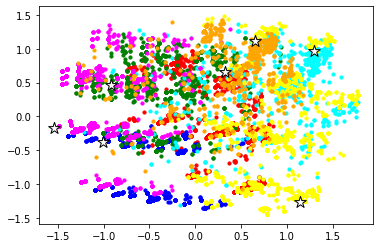

In [ ]:
plt.scatter(cluster1_gaussian['X'], cluster1_gaussian['Y'], s=10, c='red', label ='Cluster 1')
plt.scatter(cluster2_gaussian['X'], cluster2_gaussian['Y'], s=10, c='blue', label ='Cluster 2')
plt.scatter(cluster3_gaussian['X'], cluster3_gaussian['Y'], s=10, c='green', label ='Cluster 3')
plt.scatter(cluster4_gaussian['X'], cluster4_gaussian['Y'], s=10, c='cyan', label ='Cluster 4')
plt.scatter(cluster5_gaussian['X'], cluster5_gaussian['Y'], s=10, c='magenta', label ='Cluster 5')
plt.scatter(cluster6_gaussian['X'], cluster6_gaussian['Y'], s=10, c='yellow', label ='Cluster 6')
plt.scatter(cluster7_gaussian['X'], cluster7_gaussian['Y'], s=10, c='orange', label ='Cluster 7')

plt.scatter(pca_centroids_gaussian['X'], pca_centroids_gaussian['Y'], s=150, marker='*', c='white', edgecolor='black', label='centroids')
plt.show()

In [ ]:
# af = AffinityPropagation(random_state = 0, max_iter = 1000).fit(sample_final_df.drop(['target'], axis=1))
# centroids_af = af.cluster_centers_indices_
# clusters_af = af.labels_

# num_clusters = len(centroids_af)

In [ ]:
column_names_df_final = final_df.columns
sample_final_df = pd.DataFrame(np.array(final_df.sample(40000, random_state = 1)))

sample_final_df.columns = column_names_df_final
sample_final_df

,target,Elevation_elevation_high,Elevation_elevation_low,Elevation_elevation_medium,Elevation_elevation_ultra,Aspect_aspect_high,Aspect_aspect_low,Aspect_aspect_medium,Aspect_aspect_ultra,Slope_slope_high,...,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Wilderness_0,Wilderness_1,Wilderness_2,Wilderness_3
0,2,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,2,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,1,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
39996,2,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
39997,3,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
39998,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


Text(0.5, 1.0, 'PCA Number of Compoenents for Cumulative Variance')

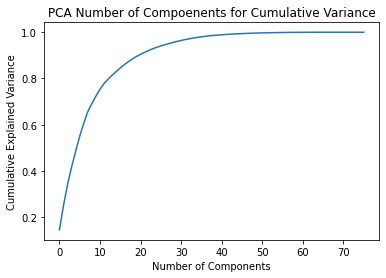

In [ ]:
#applying pca for dimension reduction 
pca = PCA().fit(sample_final_df.drop(['target'], axis = 1))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Number of Compoenents for Cumulative Variance')

In [ ]:
pca = PCA(n_components = 30)
agglo_df = pd.DataFrame(pca.fit_transform(sample_final_df.drop(['target'], axis = 1)))
agglo_df = pd.concat([agglo_df, sample_final_df['target']], axis =1)
agglo_df

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,target
0,1.131977,0.483537,-0.154831,0.992064,-0.557389,0.775090,0.480898,0.694869,-0.024654,-0.095853,...,-0.143531,-0.114379,0.019920,0.033442,-0.040867,0.058794,0.014521,-0.086231,-0.006451,2
1,-0.386491,0.877084,0.207666,0.586647,-0.122106,-0.605450,1.267610,-0.558538,-0.158178,-0.035700,...,0.046918,0.168475,-0.032444,-0.099242,0.089293,-0.125358,-0.193765,0.187035,-0.021250,2
2,-1.279279,-0.250590,-0.284898,-0.780958,0.389873,0.704413,-0.048958,-0.286414,-0.419712,0.415197,...,-0.045752,-0.010837,-0.006268,0.059064,-0.046020,0.061088,0.060295,-0.102071,0.020523,1
3,-0.815621,-0.287430,-0.301912,-0.499319,-0.603157,-0.439936,0.175555,-0.230236,1.012997,0.364520,...,0.022415,0.055771,-0.103156,0.034962,-0.028733,-0.062110,-0.015681,0.015760,0.039449,1
4,0.259692,-0.207151,-1.145921,0.128755,0.461946,-0.700356,-0.099856,-0.230543,-0.161730,-0.067784,...,-0.045171,0.004451,0.041674,0.028892,0.008957,0.008258,-0.002491,-0.007087,-0.017556,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,-0.250896,0.757144,-0.480081,0.653036,1.070195,0.100951,-0.811215,0.415497,-0.227184,0.004756,...,-0.545879,0.046024,0.123891,0.057077,-0.120821,0.063150,0.003013,-0.121181,-0.024821,1
39996,0.509697,0.689115,-0.917690,0.147806,-0.566769,0.105848,-0.566796,0.781530,-0.105565,-0.315075,...,-0.051214,-0.029744,0.040513,0.006767,0.017004,0.020642,0.007692,-0.007061,-0.019463,2
39997,0.623285,-0.240139,-0.306289,0.904697,-0.491017,1.097900,-0.628026,-0.378394,-0.073982,-0.334471,...,0.054579,-0.151245,-0.021359,-0.023341,0.004076,-0.017471,0.026879,-0.009468,-0.017877,3
39998,-1.489686,-0.186645,0.017363,-0.786761,0.266405,0.607809,-0.027802,-0.302335,-0.047494,-0.130735,...,0.019581,0.050940,-0.031106,0.028063,0.016025,-0.032324,-0.014893,0.004069,-0.005284,1


In [ ]:
#Agglomerative CLustering (Hierarchical)
agglo = AgglomerativeClustering(n_clusters=7)
result_agglo = agglo.fit_predict(agglo_df.drop(['target'], axis = 1))
clusters_agglo = agglo.labels_
result_agglo

array([2, 3, 1, ..., 2, 1, 1], dtype=int64)

In [ ]:
len(clusters_agglo), len(result_agglo)

(40000, 40000)

In [ ]:
from sklearn.neighbors import NearestCentroid
model = NearestCentroid()
model.fit(agglo_df.drop(['target'],axis =1 ), clusters_agglo)
centroids_agglo = model.centroids_
centroids_agglo

array([[ 2.74039312e-01,  3.65142111e-01, -5.61263279e-01,
        -4.67932417e-02,  1.81619225e-01,  5.28653804e-02,
        -3.40529323e-03,  6.17132731e-02, -8.81733619e-02,
         4.46985953e-02,  4.13912266e-02,  2.75097493e-02,
         1.17887653e-02,  4.56331642e-02,  1.04899985e-01,
         4.08017506e-02,  5.97058027e-02,  5.58543395e-04,
         5.49024472e-02,  2.35006468e-02,  7.88475437e-03,
        -2.22619196e-02,  1.18526183e-02, -1.18246265e-02,
         8.92012339e-03, -8.99146677e-03, -1.27262205e-02,
        -1.96683463e-02, -6.84310592e-03, -6.98524508e-03],
       [-9.84723668e-01,  4.70935194e-02, -5.43327963e-02,
        -6.57978012e-02, -1.80102847e-01, -1.01996538e-01,
        -2.43702300e-02, -2.27367846e-02,  3.30438570e-02,
         4.85085105e-03, -8.43589443e-03, -1.85047205e-02,
         2.37360683e-02, -6.07155583e-02, -3.13355622e-02,
        -1.18687292e-02, -4.20602533e-02, -1.25810319e-02,
         8.57607244e-03, -2.66625791e-02, -3.77518319e-

In [ ]:
final_df_clustered_agglo = agglo_df.copy()
final_df_clustered_agglo['Clusters'] = clusters_agglo+1

In [ ]:
pca = PCA(n_components=2)
pca_clusters_agglo = pd.DataFrame(pca.fit_transform(final_df_clustered_agglo.drop(["Clusters", "target"], axis=1)))
pca_clusters_agglo

,0,1
0,1.131976,0.483535
1,-0.386491,0.877083
2,-1.279279,-0.250588
3,-0.815621,-0.287429
4,0.259691,-0.207154
...,...,...
39995,-0.250896,0.757144
39996,0.509697,0.689113
39997,0.623285,-0.240138
39998,-1.489686,-0.186645


In [ ]:
pca_centroids_agglo = pd.DataFrame(pca.transform(centroids_agglo))
pca_centroids_agglo.columns = ['X', 'Y']
pca_centroids_agglo

,X,Y
0,0.274039,0.365142
1,-0.984724,0.047094
2,0.973361,-0.673984
3,-0.330578,0.149029
4,-0.516627,-0.743577
5,0.726008,-0.524306
6,1.087114,0.440832


In [ ]:
pca_clusters_agglo_ = pd.concat([pca_clusters_agglo, final_df_clustered_agglo['Clusters']], axis =1)
pca_clusters_agglo_

,0,1,Clusters
0,1.131976,0.483535,3
1,-0.386491,0.877083,4
2,-1.279279,-0.250588,2
3,-0.815621,-0.287429,2
4,0.259691,-0.207154,1
...,...,...,...
39995,-0.250896,0.757144,1
39996,0.509697,0.689113,1
39997,0.623285,-0.240138,3
39998,-1.489686,-0.186645,2


In [ ]:
#selecting sample of 10000 for plotting
plotting_df_agglo = pd.DataFrame(np.array(pca_clusters_agglo_.sample(10000)))
plotting_df_agglo.columns = ['X', 'Y', 'Clusters']
plotting_df_agglo

,X,Y,Clusters
0,-0.278850,-1.196889,5.0
1,0.217088,-0.527783,6.0
2,-1.101412,0.358100,2.0
3,0.550536,0.054999,6.0
4,0.583293,-0.268695,3.0
...,...,...,...
9995,0.954949,0.261275,7.0
9996,0.825123,-0.357192,7.0
9997,-0.109467,-0.275904,1.0
9998,-0.223109,-0.352375,5.0


In [ ]:
cluster1_agglo = plotting_df_agglo[plotting_df_agglo['Clusters'] == 1]
cluster2_agglo = plotting_df_agglo[plotting_df_agglo['Clusters'] == 2]
cluster3_agglo = plotting_df_agglo[plotting_df_agglo['Clusters'] == 3]
cluster4_agglo = plotting_df_agglo[plotting_df_agglo['Clusters'] == 4]
cluster5_agglo = plotting_df_agglo[plotting_df_agglo['Clusters'] == 5]
cluster6_agglo = plotting_df_agglo[plotting_df_agglo['Clusters'] == 6]
cluster7_agglo = plotting_df_agglo[plotting_df_agglo['Clusters'] == 7]

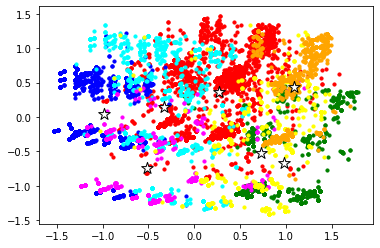

In [ ]:
plt.scatter(cluster1_agglo['X'], cluster1_agglo['Y'], s=10, c='red', label ='Cluster 1')
plt.scatter(cluster2_agglo['X'], cluster2_agglo['Y'], s=10, c='blue', label ='Cluster 2')
plt.scatter(cluster3_agglo['X'], cluster3_agglo['Y'], s=10, c='green', label ='Cluster 3')
plt.scatter(cluster4_agglo['X'], cluster4_agglo['Y'], s=10, c='cyan', label ='Cluster 4')
plt.scatter(cluster5_agglo['X'], cluster5_agglo['Y'], s=10, c='magenta', label ='Cluster 5')
plt.scatter(cluster6_agglo['X'], cluster6_agglo['Y'], s=10, c='yellow', label ='Cluster 6')
plt.scatter(cluster7_agglo['X'], cluster7_agglo['Y'], s=10, c='orange', label ='Cluster 7')

plt.scatter(pca_centroids_agglo['X'], pca_centroids_agglo['Y'], s=150, marker='*', c='white', edgecolor='black', label='centroids')
plt.show()

In [ ]:
sample_final_df_dbscan = pd.DataFrame(np.array(final_df.sample(50000, random_state = 1)))

sample_final_df_dbscan.columns = column_names_df_final
sample_final_df_dbscan

,target,Elevation_elevation_high,Elevation_elevation_low,Elevation_elevation_medium,Elevation_elevation_ultra,Aspect_aspect_high,Aspect_aspect_low,Aspect_aspect_medium,Aspect_aspect_ultra,Slope_slope_high,...,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Wilderness_0,Wilderness_1,Wilderness_2,Wilderness_3
0,2,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,2,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
49996,1,1,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
49997,2,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
49998,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


Text(0.5, 1.0, 'PCA Number of Compoenents for Cumulative Variance')

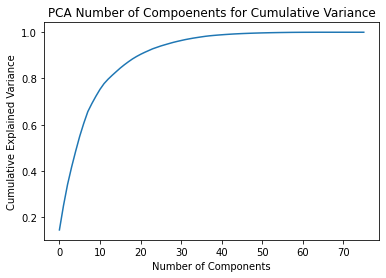

In [ ]:
#applying pca for dimension reduction 
pca = PCA().fit(sample_final_df_dbscan.drop(['target'], axis = 1))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Number of Compoenents for Cumulative Variance')

In [ ]:
pca = PCA(n_components = 30)
dbscan_df = pd.DataFrame(pca.fit_transform(sample_final_df_dbscan.drop(['target'], axis = 1)))
dbscan_df = pd.concat([dbscan_df, sample_final_df_dbscan['target']], axis =1)
dbscan_df

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,target
0,1.139208,0.450261,-0.163096,0.994453,-0.571740,0.781512,0.465951,0.685886,-0.034712,-0.075696,...,-0.144560,-0.107255,0.053828,0.038392,-0.049412,0.065396,0.017070,-0.078361,-0.005773,2
1,-0.379251,0.869576,0.185593,0.599254,-0.115808,-0.619089,1.282294,-0.510895,-0.166691,-0.053875,...,0.060475,0.153654,-0.075859,-0.097200,0.102808,-0.156898,-0.194698,0.151143,-0.033465,2
2,-1.283265,-0.232585,-0.278847,-0.788200,0.385557,0.698065,-0.035165,-0.286969,-0.428743,0.415688,...,-0.049274,-0.015828,-0.005346,0.056068,-0.053668,0.069094,0.061627,-0.089041,0.030284,1
3,-0.821690,-0.281888,-0.293793,-0.501019,-0.597272,-0.448306,0.185720,-0.221991,1.011856,0.376251,...,0.028372,0.023877,-0.110722,0.031444,-0.030656,-0.066137,-0.009762,0.016800,0.037932,1
4,0.255481,-0.239543,-1.144182,0.130318,0.457174,-0.699483,-0.108350,-0.221713,-0.164999,-0.057791,...,-0.050133,0.017398,0.038232,0.033090,0.007381,0.007432,-0.003510,-0.009717,-0.017740,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,-0.723516,0.510328,0.050801,0.029747,-1.225154,-0.228506,-0.312983,0.703493,0.162731,-0.371966,...,0.019055,0.004561,-0.007870,-0.019819,0.046508,-0.039657,-0.025047,0.028393,-0.026502,2
49996,-0.440999,0.565099,0.883253,-0.845578,0.694639,0.139433,0.015271,0.110193,0.902106,0.039338,...,0.029345,0.064514,-0.017537,-0.207953,-0.176941,-0.282993,0.838073,0.131458,0.046150,1
49997,0.281536,-1.202583,0.961588,-0.325996,-0.268677,-0.024176,0.048743,-0.222935,1.012617,0.468361,...,-0.062346,-0.060322,-0.049269,0.016685,-0.051163,-0.083131,-0.136364,0.001821,0.053349,2
49998,-1.049618,0.645860,0.164056,-0.082181,-0.141768,0.551637,-0.410672,1.088022,-0.162932,0.109955,...,0.040772,0.002377,-0.000615,-0.056253,0.151043,-0.136578,-0.143968,0.081849,-0.089482,1


In [ ]:
#DBSCAN Density Based Clustering Algorithm
dbscan = DBSCAN(eps=4.7, min_samples=26, metric = 'manhattan')
dbscan.fit(dbscan_df.drop(['target'], axis = 1))

DBSCAN(eps=4.7, metric='manhattan', min_samples=26)

In [ ]:
clusters_dbscan = dbscan.labels_
clusters_dbscan

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
pd.DataFrame(clusters_dbscan).describe()

,0
count,50000.000000
mean,0.207080
std,0.765173
min,-1.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,6.000000


In [ ]:
final_df_clustered_dbscan = dbscan_df.copy()
final_df_clustered_dbscan['Clusters'] = clusters_dbscan+1

In [ ]:
pca = PCA(n_components=2)
pca_clusters_dbscan = pd.DataFrame(pca.fit_transform(final_df_clustered_dbscan.drop(["Clusters", "target"], axis=1)))
pca_clusters_dbscan

,0,1
0,1.139208,0.450259
1,-0.379251,0.869575
2,-1.283266,-0.232581
3,-0.821690,-0.281888
4,0.255481,-0.239546
...,...,...
49995,-0.723516,0.510329
49996,-0.440999,0.565100
49997,0.281536,-1.202584
49998,-1.049618,0.645859


In [ ]:
pca_clusters_dbscan_ = pd.concat([pca_clusters_dbscan, final_df_clustered_dbscan['Clusters']], axis =1)
pca_clusters_dbscan_

,0,1,Clusters
0,1.139208,0.450259,1
1,-0.379251,0.869575,1
2,-1.283266,-0.232581,1
3,-0.821690,-0.281888,1
4,0.255481,-0.239546,1
...,...,...,...
49995,-0.723516,0.510329,1
49996,-0.440999,0.565100,1
49997,0.281536,-1.202584,1
49998,-1.049618,0.645859,1


In [ ]:
#selecting sample of 10000 for plotting
plotting_df_dbscan = pd.DataFrame(np.array(pca_clusters_dbscan_.sample(10000)))
plotting_df_dbscan.columns = ['X', 'Y', 'Clusters']
plotting_df_dbscan

,X,Y,Clusters
0,1.294320,1.107256,1.0
1,0.643812,-0.348772,1.0
2,1.194627,-1.109156,1.0
3,-1.151635,0.656748,1.0
4,-0.862590,-1.164756,3.0
...,...,...,...
9995,0.020384,-0.149974,1.0
9996,0.606376,-0.781220,0.0
9997,0.944034,0.054809,1.0
9998,0.296205,-0.211367,1.0


In [ ]:
cluster1_dbscan = plotting_df_dbscan[plotting_df_dbscan['Clusters'] == 1]
cluster2_dbscan = plotting_df_dbscan[plotting_df_dbscan['Clusters'] == 2]
cluster3_dbscan = plotting_df_dbscan[plotting_df_dbscan['Clusters'] == 3]
cluster4_dbscan = plotting_df_dbscan[plotting_df_dbscan['Clusters'] == 4]
cluster5_dbscan = plotting_df_dbscan[plotting_df_dbscan['Clusters'] == 5]
cluster6_dbscan = plotting_df_dbscan[plotting_df_dbscan['Clusters'] == 6]
cluster7_dbscan = plotting_df_dbscan[plotting_df_dbscan['Clusters'] == 7]
cluster0_dbscan = plotting_df_dbscan[plotting_df_dbscan['Clusters'] == 0]

In [ ]:
# plt.scatter(cluster1_dbscan['X'], cluster1_dbscan['Y'], s=10, c='red', label ='Cluster 1')
# plt.scatter(cluster2_dbscan['X'], cluster2_dbscan['Y'], s=10, c='blue', label ='Cluster 2')
# plt.scatter(cluster3_dbscan['X'], cluster3_dbscan['Y'], s=10, c='green', label ='Cluster 3')
# plt.scatter(cluster4_dbscan['X'], cluster4_dbscan['Y'], s=10, c='cyan', label ='Cluster 4')
# plt.scatter(cluster5_dbscan['X'], cluster5_dbscan['Y'], s=10, c='magenta', label ='Cluster 5')
# plt.scatter(cluster6_dbscan['X'], cluster6_dbscan['Y'], s=10, c='yellow', label ='Cluster 6')
# plt.scatter(cluster7_dbscan['X'], cluster7_dbscan['Y'], s=10, c='orange', label ='Cluster 7')
# plt.scatter(cluster0_dbscan['X'], cluster0_dbscan['Y'], s=10, c='grey', label ='Cluster 0')

# plt.scatter(pca_centroids_dbscan['X'], pca_centroids_dbscan['Y'], s=150, marker='*', c='white', edgecolor='black', label='centroids')
# plt.show()

In [ ]:
model = NearestCentroid()
model.fit(dbscan_df.drop(['target'],axis =1 ), clusters_dbscan)
centroids_dbscan = model.centroids_
centroids_dbscan

array([[ 4.50386391e-01,  3.70185014e-01,  4.38239586e-01,
        -9.20932825e-02,  2.04765810e-01,  2.90450512e-01,
         3.53556749e-01,  1.10042139e-01, -1.03365149e-01,
         2.07939508e-01,  9.64815431e-02, -2.74392263e-02,
         1.97108428e-02,  9.54147528e-03,  4.62727940e-01,
         4.77877126e-02,  1.99504017e-02,  6.20837975e-03,
         2.71436747e-01,  3.60073197e-02, -5.29678565e-02,
         1.27286815e-01,  2.34118409e-01,  1.83275445e-01,
         7.95355793e-02, -1.94134968e-01, -1.16977563e-02,
         3.78356063e-02, -3.66057693e-03,  3.05496746e-02],
       [ 5.18668385e-02, -1.38770430e-02, -1.36041167e-02,
         3.96913110e-03,  5.03385939e-03, -1.46004865e-02,
        -1.45559841e-02, -1.23156524e-02,  1.55655956e-02,
        -1.47655326e-02, -2.10758178e-02,  1.25795632e-02,
        -2.80994422e-02,  3.55089215e-02, -3.00827737e-02,
        -5.29375245e-02, -3.27956535e-02,  5.41459661e-03,
        -6.72679282e-03, -1.68994173e-02,  4.90679876e-

In [ ]:
pca_centroids_dbscan = pd.DataFrame(pca.transform(centroids_dbscan))
pca_centroids_dbscan.columns = ['X', 'Y']
pca_centroids_dbscan

,X,Y
0,0.450386,0.370185
1,0.051867,-0.013877
2,-0.033929,0.299425
3,-0.749306,-0.865969
4,-1.058017,0.272392
5,0.093120,0.123935
6,-0.349120,0.490244
7,-0.814090,0.182651


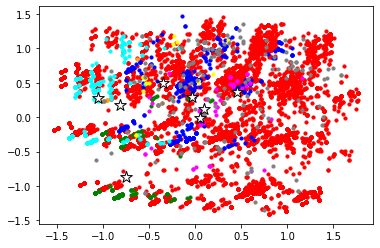

In [ ]:
plt.scatter(cluster1_dbscan['X'], cluster1_dbscan['Y'], s=10, c='red', label ='Cluster 1')
plt.scatter(cluster2_dbscan['X'], cluster2_dbscan['Y'], s=10, c='blue', label ='Cluster 2')
plt.scatter(cluster3_dbscan['X'], cluster3_dbscan['Y'], s=10, c='green', label ='Cluster 3')
plt.scatter(cluster4_dbscan['X'], cluster4_dbscan['Y'], s=10, c='cyan', label ='Cluster 4')
plt.scatter(cluster5_dbscan['X'], cluster5_dbscan['Y'], s=10, c='magenta', label ='Cluster 5')
plt.scatter(cluster6_dbscan['X'], cluster6_dbscan['Y'], s=10, c='yellow', label ='Cluster 6')
plt.scatter(cluster7_dbscan['X'], cluster7_dbscan['Y'], s=10, c='orange', label ='Cluster 7')
plt.scatter(cluster0_dbscan['X'], cluster0_dbscan['Y'], s=10, c='grey', label ='Cluster 0')

plt.scatter(pca_centroids_dbscan['X'], pca_centroids_dbscan['Y'], s=150, marker='*', c='white', edgecolor='black', label='centroids')
plt.show()

In [ ]:
#Plotting true label values as histograms
a = pca_clusters_kmeans_['Clusters'].value_counts()
b = pca_clusters_gaussian_['Clusters'].value_counts()
c = pca_clusters_agglo_['Clusters'].value_counts()
d = pca_clusters_dbscan_['Clusters'].value_counts()
a,b,c,d

(4    80543
 5    77973
 6    62183
 1    61066
 3    53961
 7    45355
 2    25627
 Name: Clusters, dtype: int64,
 1    82939
 6    82614
 3    62609
 2    61067
 5    58533
 4    30537
 7    28409
 Name: Clusters, dtype: int64,
 1    11510
 2    10262
 3     4557
 4     4462
 7     3355
 5     3144
 6     2710
 Name: Clusters, dtype: int64,
 1    44168
 2     1979
 4     1692
 3      950
 0      732
 5      304
 6      135
 7       40
 Name: Clusters, dtype: int64)

In [ ]:
a_ = pd.DataFrame(a)
b_ = pd.DataFrame(b)
c_ = pd.DataFrame(c)
d_ = pd.DataFrame(d)
a_.reset_index(level=0, inplace=True)
b_.reset_index(level=0, inplace=True)
c_.reset_index(level=0, inplace=True)
d_.reset_index(level=0, inplace=True)
a_.columns = ['cluster', 'kmeans']
b_.columns = ['cluster', 'gaussian']
c_.columns = ['cluster', 'agglomerative']
d_.columns = ['cluster', 'dbscan']
a_,b_,c_,d_

(   cluster  kmeans
 0        4   80543
 1        5   77973
 2        6   62183
 3        1   61066
 4        3   53961
 5        7   45355
 6        2   25627,
    cluster  gaussian
 0        1     82939
 1        6     82614
 2        3     62609
 3        2     61067
 4        5     58533
 5        4     30537
 6        7     28409,
    cluster  agglomerative
 0        1          11510
 1        2          10262
 2        3           4557
 3        4           4462
 4        7           3355
 5        5           3144
 6        6           2710,
    cluster  dbscan
 0        1   44168
 1        2    1979
 2        4    1692
 3        3     950
 4        0     732
 5        5     304
 6        6     135
 7        7      40)

In [ ]:
bar_plotting = a_.merge(b_, how = 'inner')
bar_plotting = bar_plotting.merge(c_, how = 'inner')
bar_plotting = bar_plotting.merge(d_, how = 'inner')
bar_plotting

,cluster,kmeans,gaussian,agglomerative,dbscan
0,4,80543,30537,4462,1692
1,5,77973,58533,3144,304
2,6,62183,82614,2710,135
3,1,61066,82939,11510,44168
4,3,53961,62609,4557,950
5,7,45355,28409,3355,40
6,2,25627,61067,10262,1979


<AxesSubplot:xlabel='cluster'>

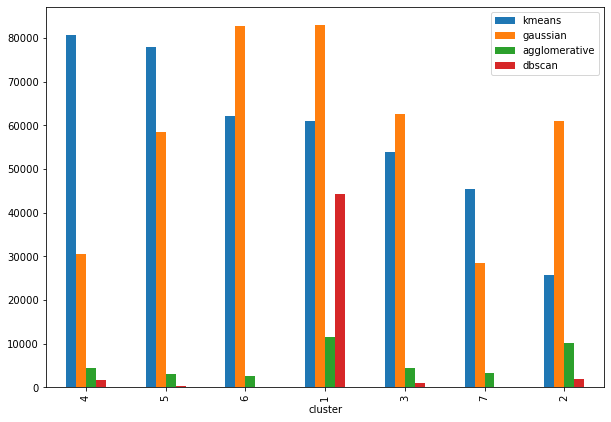

In [ ]:
bar_plotting.plot.bar(figsize=(10,7), x = 'cluster')

In [ ]:
#Getting true label count and plotting against the models predictions
sample_truelabelcount_final_df = pd.DataFrame(np.array(final_df.sample(10000, random_state = 1)))
sample_truelabelcount_final_df.columns = column_names_df_final
e = pd.DataFrame(final_df['target'].value_counts())
e.reset_index(level=0, inplace=True)
e.columns = ['cluster','true label count']
e

,cluster,true label count
0,2,198310
1,1,148288
2,3,25028
3,7,14357
4,6,12157
5,5,6645
6,4,1923


In [ ]:
bar_plotting = bar_plotting.merge(e, how = 'inner')
bar_plotting = bar_plotting.sort_values(by=['cluster'])
bar_plotting

,cluster,kmeans,gaussian,agglomerative,dbscan,true label count
3,1,61066,82939,11510,44168,148288
6,2,25627,61067,10262,1979,198310
4,3,53961,62609,4557,950,25028
0,4,80543,30537,4462,1692,1923
1,5,77973,58533,3144,304,6645
2,6,62183,82614,2710,135,12157
5,7,45355,28409,3355,40,14357


<AxesSubplot:xlabel='cluster'>

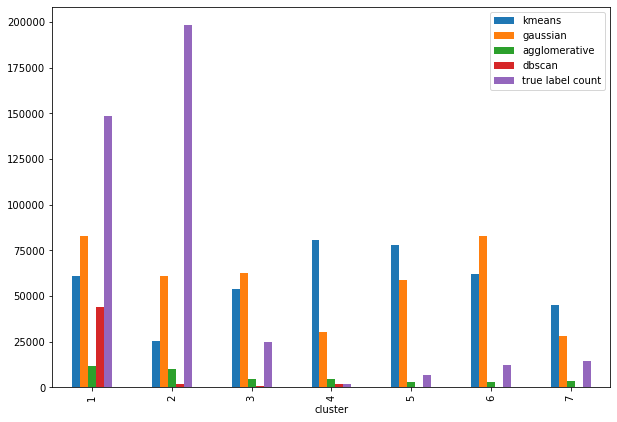

In [ ]:
bar_plotting.plot.bar(figsize=(10,7), x = 'cluster')

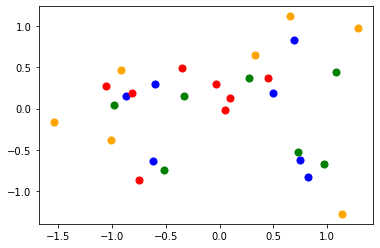

In [ ]:
#Plotting centroids of all models
plt.scatter(pca_centroids_agglo['X'], pca_centroids_agglo['Y'], s=50, c='green', label='agglo')
plt.scatter(pca_centroids_gaussian['X'], pca_centroids_gaussian['Y'], s=50, c='orange', label='gaussian')
plt.scatter(pca_centroids_kmeans['X'], pca_centroids_kmeans['Y'], s=50, c='blue', label='kmeans')
plt.scatter(pca_centroids_dbscan['X'], pca_centroids_dbscan['Y'], s=50, c='red', label='dbscan')
plt.show()

In [17]:
def predict(test_set) :
    # find and load your best model
    # Do all preprocessings inside this function only.
    # predict on the test set provided
    '''
    'test_set' is a csv path "test.csv", You need to read the csv and predict using your model.
    '''
    df = pd.read_csv(test_set)
    df.head()
    df.info()
    df.nunique()
    df.isna().sum()
    numerical_df = pd.DataFrame()
    categorical_df = df.copy()
    categorical_df["Soil_Type"] = categorical_df["Soil_Type"].astype('category')
    categorical_df["Wilderness"] = categorical_df["Wilderness"].astype('category')
    categorical_df["Horizontal_Distance_To_Hydrology"] = categorical_df["Horizontal_Distance_To_Hydrology"].astype('category')
    categorical_df["Vertical_Distance_To_Hydrology"] = categorical_df["Vertical_Distance_To_Hydrology"].astype('category')
    categorical_ohe_df = pd.get_dummies(categorical_df)
    final_df = categorical_ohe_df.copy()
    pca = PCA().fit(final_df.drop(['target'], axis = 1))

    pca = PCA(n_components = 30)
    gaussian_df = pd.DataFrame(pca.fit_transform(final_df.drop(['target'], axis = 1)))
    gaussian_df = pd.concat([gaussian_df, final_df['target']], axis =1)

    gaussian_mix = pickle.load(open(filename, 'rb'))

    '''
    prediction is a 1D 'list' of output labels. just a single python list.
    '''
    prediction = gaussian_mix.predict(gaussian_df.drop(['target'], axis=1))
    return prediction

In [18]:
ans = predict('/content/drive/MyDrive/datadmg/covtype_train.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406708 entries, 0 to 406707
Data columns (total 11 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   Elevation                           406708 non-null  object
 1   Aspect                              406708 non-null  object
 2   Slope                               406708 non-null  object
 3   Hillshade_9am                       406708 non-null  object
 4   Hillshade_Noon                      406708 non-null  object
 5   Horizontal_Distance_To_Hydrology    406708 non-null  int64 
 6   Vertical_Distance_To_Hydrology      406708 non-null  int64 
 7   Horizontal_Distance_To_Fire_Points  406708 non-null  object
 8   Soil_Type                           406708 non-null  int64 
 9   Wilderness                          406708 non-null  int64 
 10  target                              406708 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 34

In [19]:
print(ans)

[4 3 3 ... 2 4 5]
